In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

dataroot = '../WaterLevelPredction_SelectingModel//Data/'

In [103]:
df = pd.read_pickle(dataroot+'finaldata.pkl')

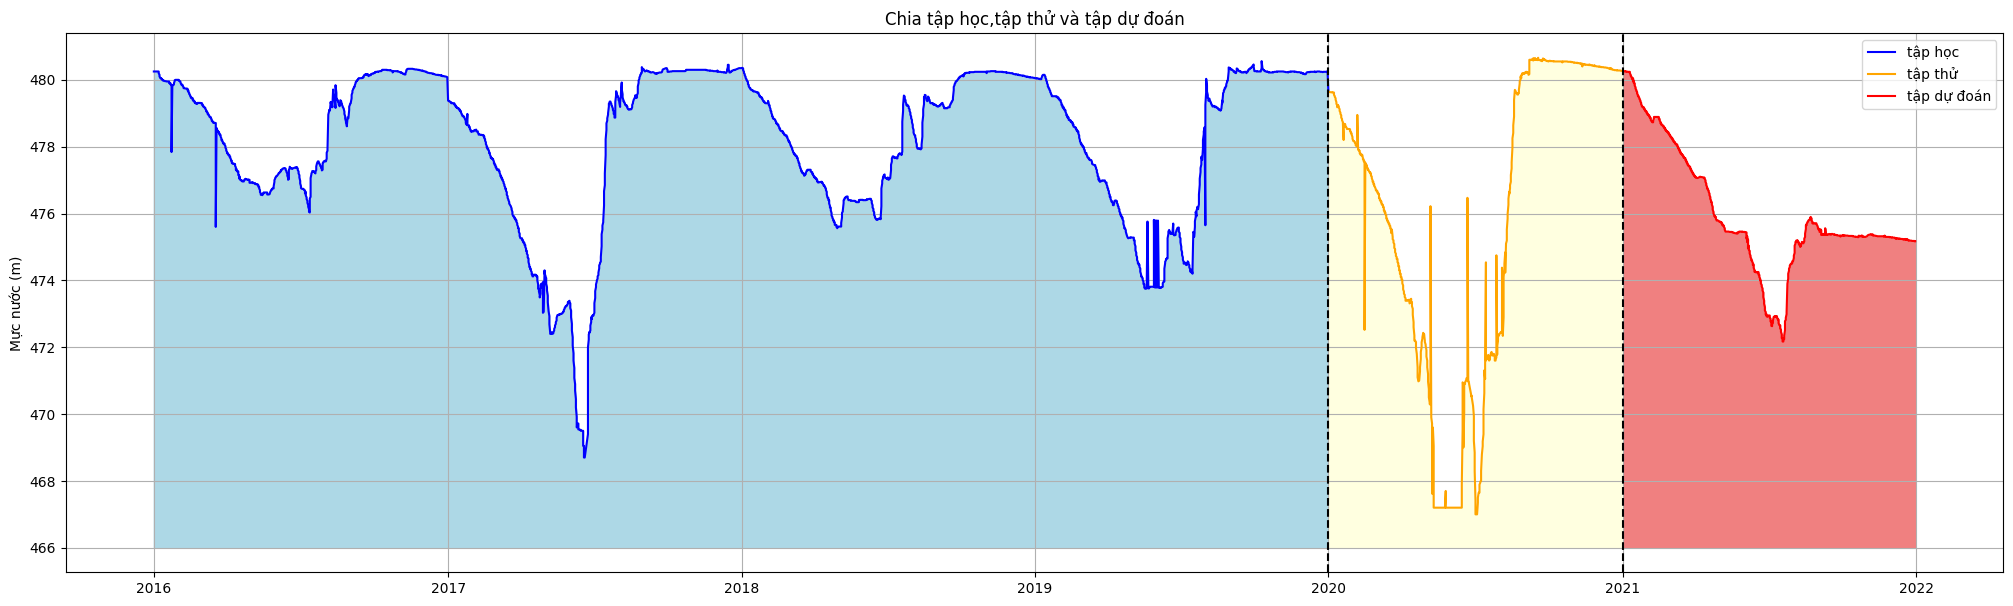

In [104]:
# Train and test split

train = df.iloc[:2915]
val = df.iloc[2915:3648]
pred = df.iloc[3648:]

plt.figure(figsize=(25, 7))

plt.title('Chia tập học,tập thử và tập dự đoán')

plt.plot(train['date'], train['water_level'], label='tập học', color='blue')
plt.plot(val['date'], val['water_level'], label='tập thử', color='orange')
plt.plot(pred['date'], pred['water_level'], label='tập dự đoán', color='red')

plt.fill_between(train['date'], 466, train['water_level'], color='lightblue')
plt.fill_between(val['date'], 466, val['water_level'], color='lightyellow')
plt.fill_between(pred['date'], 466, pred['water_level'], color='lightcoral')

plt.ylabel('Mực nước (m)')

plt.axvline(train['date'].iloc[-1], color='black', linestyle='--')
plt.axvline(val['date'].iloc[-1], color='black', linestyle='--')

plt.grid()
plt.legend()
plt.show()

In [105]:
feature = ['month','hour','precipitation','sluice_status']
target = 'water_level'

In [106]:
X_train = train[feature]
y_train = train[target]

X_val = val[feature]
y_val = val[target]

X_pred = pred[feature]
y_pred = pred[target]

In [107]:
%%time
xgb_reg = xgb.XGBRegressor(n_estimators=1000,
                           learning_rate=0.01,
                           early_stopping_rounds=50,
                          )

xgb_reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train),(X_val, y_val)],
        verbose=True)

[0]	validation_0-rmse:2.21790	validation_1-rmse:5.20100
[1]	validation_0-rmse:2.20090	validation_1-rmse:5.18294
[2]	validation_0-rmse:2.18412	validation_1-rmse:5.16509
[3]	validation_0-rmse:2.16753	validation_1-rmse:5.14743
[4]	validation_0-rmse:2.15115	validation_1-rmse:5.12996
[5]	validation_0-rmse:2.13498	validation_1-rmse:5.11268
[6]	validation_0-rmse:2.11901	validation_1-rmse:5.09558
[7]	validation_0-rmse:2.10323	validation_1-rmse:5.07866
[8]	validation_0-rmse:2.08765	validation_1-rmse:5.06193
[9]	validation_0-rmse:2.07226	validation_1-rmse:5.04536
[10]	validation_0-rmse:2.05707	validation_1-rmse:5.02900
[11]	validation_0-rmse:2.04206	validation_1-rmse:5.01279
[12]	validation_0-rmse:2.02724	validation_1-rmse:4.99681
[13]	validation_0-rmse:2.01260	validation_1-rmse:4.98096
[14]	validation_0-rmse:1.99816	validation_1-rmse:4.96529
[15]	validation_0-rmse:1.98390	validation_1-rmse:4.94979
[16]	validation_0-rmse:1.96981	validation_1-rmse:4.93448
[17]	validation_0-rmse:1.95591	validation

[29]	validation_0-rmse:1.80238	validation_1-rmse:4.75000
[30]	validation_0-rmse:1.79065	validation_1-rmse:4.73690
[31]	validation_0-rmse:1.77907	validation_1-rmse:4.72395
[32]	validation_0-rmse:1.76765	validation_1-rmse:4.71112
[33]	validation_0-rmse:1.75638	validation_1-rmse:4.69844
[34]	validation_0-rmse:1.74527	validation_1-rmse:4.68589
[35]	validation_0-rmse:1.73430	validation_1-rmse:4.67350
[36]	validation_0-rmse:1.72348	validation_1-rmse:4.66125
[37]	validation_0-rmse:1.71281	validation_1-rmse:4.64912
[38]	validation_0-rmse:1.70227	validation_1-rmse:4.63712
[39]	validation_0-rmse:1.69189	validation_1-rmse:4.62528
[40]	validation_0-rmse:1.68164	validation_1-rmse:4.61354
[41]	validation_0-rmse:1.67154	validation_1-rmse:4.60195
[42]	validation_0-rmse:1.66158	validation_1-rmse:4.59049
[43]	validation_0-rmse:1.65176	validation_1-rmse:4.57914
[44]	validation_0-rmse:1.64206	validation_1-rmse:4.56792
[45]	validation_0-rmse:1.63251	validation_1-rmse:4.55681
[46]	validation_0-rmse:1.62308	

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [108]:
fi = pd.DataFrame(data=xgb_reg.feature_importances_,
              index=xgb_reg.feature_names_in_,
              columns=['importance'])

<Figure size 1000x600 with 0 Axes>

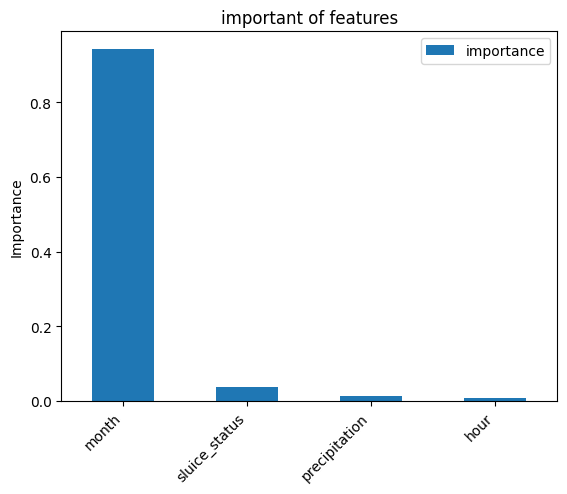

In [109]:
plt.figure(figsize=(10, 6))
fi = fi.sort_values(by='importance', ascending=False)
fi.plot(kind='bar', legend=True)
plt.title('important of features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [110]:
val['validation'] = xgb_reg.predict(X_val)
df.merge(val[['validation']],how='left',left_index=True, right_index=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10848\3513281306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['validation'] = xgb_reg.predict(X_val)


,year,month,day,water_level,hour,precipitation,sluice_status,date,validation
0,2016,1,1,480.25,0,0.0,0,2016-01-01,NaN
1,2016,1,1,480.25,1,0.0,0,2016-01-01,NaN
2,2016,1,2,480.25,0,0.0,0,2016-01-02,NaN
3,2016,1,2,480.25,1,0.0,0,2016-01-02,NaN
4,2016,1,3,480.25,0,0.0,0,2016-01-03,NaN
...,...,...,...,...,...,...,...,...,...
4371,2021,12,29,475.18,1,0.0,0,2021-12-29,NaN
4372,2021,12,30,475.18,0,0.0,0,2021-12-30,NaN
4373,2021,12,30,475.17,1,0.0,0,2021-12-30,NaN
4374,2021,12,31,475.17,0,0.0,0,2021-12-31,NaN


In [111]:
rmse = np.sqrt(mean_squared_error(val['water_level'], val['validation']))
print("RMSE:", rmse)

r2 = r2_score(val['water_level'], val['validation'])
print("R2 Score:", r2)

RMSE: 3.5416976373108753
R2 Score: 0.42978071063959067


In [112]:
pred['prediction'] = xgb_reg.predict(X_pred)
df.merge(pred['prediction'],how='left',left_index=True, right_index=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10848\222522798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['prediction'] = xgb_reg.predict(X_pred)


,year,month,day,water_level,hour,precipitation,sluice_status,date,prediction
0,2016,1,1,480.25,0,0.0,0,2016-01-01,NaN
1,2016,1,1,480.25,1,0.0,0,2016-01-01,NaN
2,2016,1,2,480.25,0,0.0,0,2016-01-02,NaN
3,2016,1,2,480.25,1,0.0,0,2016-01-02,NaN
4,2016,1,3,480.25,0,0.0,0,2016-01-03,NaN
...,...,...,...,...,...,...,...,...,...
4371,2021,12,29,475.18,1,0.0,0,2021-12-29,480.205872
4372,2021,12,30,475.18,0,0.0,0,2021-12-30,480.204498
4373,2021,12,30,475.17,1,0.0,0,2021-12-30,480.205872
4374,2021,12,31,475.17,0,0.0,0,2021-12-31,480.204498


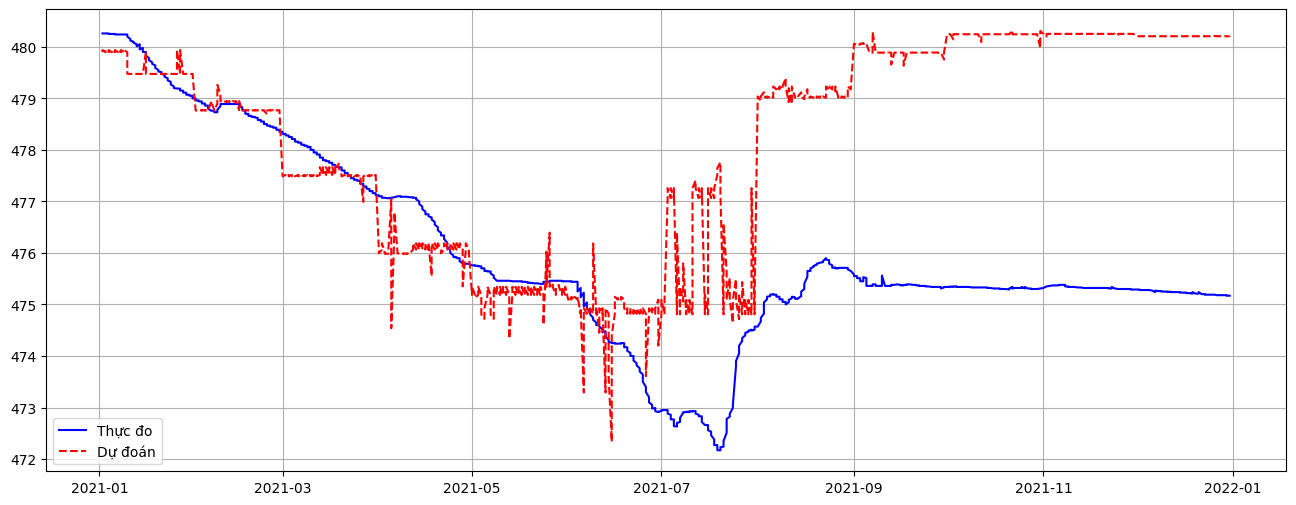

In [113]:
plt.figure(figsize=(16, 6))
plt.plot(pred['date'], pred['water_level'], label='Thực đo', color='blue')
plt.plot(pred['date'], pred['prediction'], label='Dự đoán', color='red', linestyle='dashed')

plt.legend()
plt.grid()
plt.show()